In [1]:
import local_models.local_models as local_models
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
reload(local_models)
mpl.rcParams['figure.figsize'] = [8.0, 8.0]
np.random.seed(1)

In [2]:
n = 100
sigma = 0
k = 13

In [3]:
X1 = np.linspace(0.,2.,n)
X2 = np.linspace(0.,2.,n)

In [4]:
y1 = 3*X1 + 4 + np.random.normal(0,sigma,n)

In [5]:
y2 = 3*X2 + 2 + np.random.normal(0,sigma,n)

In [6]:
colors = np.concatenate((np.ones(n), np.zeros(n)))

In [7]:
y = np.concatenate((y1,y2))
x = np.concatenate((X1,X2))

In [8]:
print(x.shape, y.shape)

(200,) (200,)


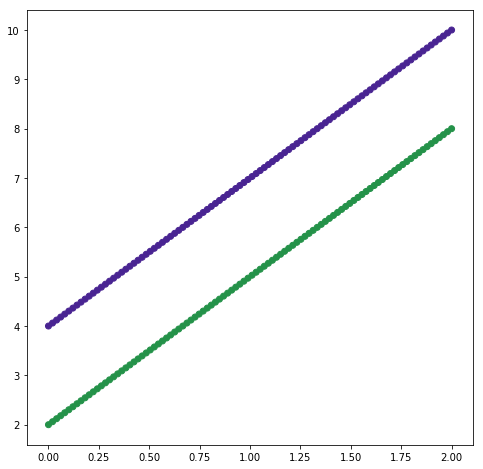

In [9]:
plt.scatter(x,y,c=cmap(colors))
plt.show()

In [20]:
models = local_models.LocalModels(sklearn.decomposition.PCA(1))

In [21]:
models.fit(np.stack((x,y)).T, None, np.stack((x,y)).T)

In [22]:
lm_params = models.transform(np.stack((x,y)).T,k=k)

querying!
4
6
7
(array([[ 0.        ,  0.00408122,  0.01632486, ...,  0.40036731,
         0.4019998 ,  0.40689726],
       [ 0.        ,  0.00408122,  0.00408122, ...,  0.33057851,
         0.40036731,  0.4019998 ],
       [ 0.        ,  0.00408122,  0.00408122, ...,  0.26119784,
         0.33057851,  0.40036731],
       ..., 
       [ 0.        ,  0.00408122,  0.00408122, ...,  0.26119784,
         0.33057851,  0.40036731],
       [ 0.        ,  0.00408122,  0.00408122, ...,  0.33057851,
         0.40036731,  0.4019998 ],
       [ 0.        ,  0.00408122,  0.01632486, ...,  0.40036731,
         0.4019998 ,  0.40689726]]), array([[  0,   1,   2, ..., 130, 129, 131],
       [  1,   0,   2, ...,  10, 131, 130],
       [  2,   3,   1, ...,  10,  11, 132],
       ..., 
       [197, 198, 196, ..., 189, 188,  67],
       [198, 199, 197, ..., 189,  68,  69],
       [199, 198, 197, ...,  69,  70,  68]]))


In [23]:
lm_params.shape

(200, 2)

In [24]:
lm_params

array([[ 0.64865473, -0.76108281],
       [ 0.52550603, -0.85078987],
       [ 0.05641507, -0.9984074 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.31622777,

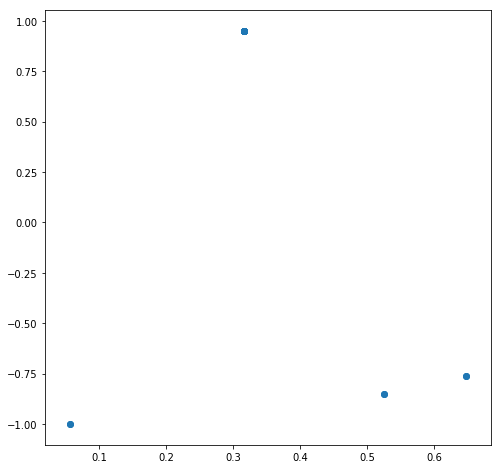

In [25]:
plt.scatter(lm_params[:,0], lm_params[:,1])
plt.show()

In [35]:
clf = sklearn.cluster.KMeans(2)
clf_data = np.concatenate((lm_params,x.reshape((-1,1)),y.reshape((-1,1))), axis=1)

In [36]:
clf.fit(clf_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

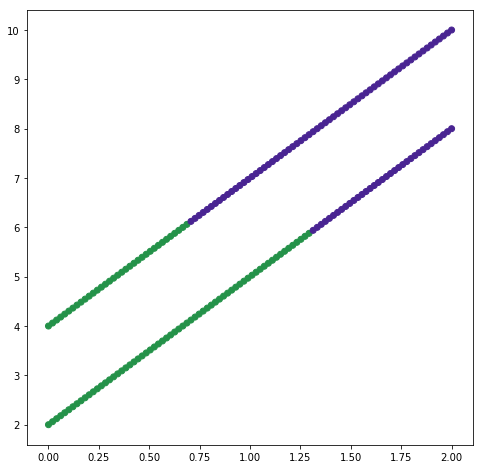

In [40]:
plt.scatter(x,y,c=cmap(clf.predict(clf_data)))
plt.show()

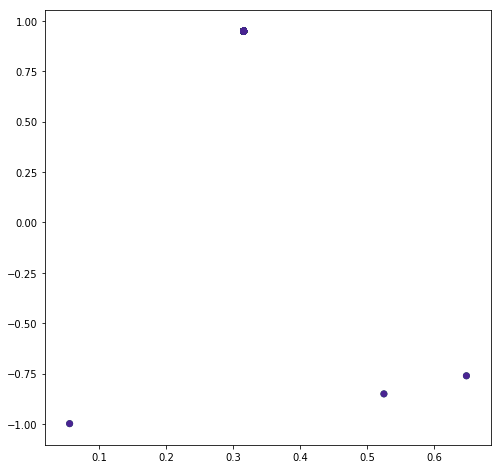

In [39]:
plt.scatter(lm_params[:,0], lm_params[:,1], c=cmap(clf.predict(clf_data)))
plt.show()

In [41]:
g = np.mgrid[0:2:0.02, 0:10:0.1]
xx = np.vstack(map(np.ravel, g)).T

In [43]:
xx.shape

(10000, 2)

In [44]:
clf_grid = np.concatenate((models.transform(xx, k=k), xx), axis=1)
pred = clf.predict(clf_grid)

querying!
4
6
7
(array([[  4.00000000e+00,   4.24650546e+00,   4.50117335e+00, ...,
          6.83236404e+00,   7.16049383e+00,   7.49678604e+00],
       [  3.61000000e+00,   3.84438425e+00,   4.08693093e+00, ...,
          6.32115192e+00,   6.63716049e+00,   6.96133150e+00],
       [  3.24000000e+00,   3.46226303e+00,   3.69268850e+00, ...,
          5.82993980e+00,   6.13382716e+00,   6.44587695e+00],
       ..., 
       [  6.57181920e-03,   7.01259055e-03,   1.42934803e-02, ...,
          1.26804449e-01,   1.75338272e-01,   2.32034527e-01],
       [  1.97943067e-03,   5.49743904e-03,   6.62385471e-03, ...,
          1.98016570e-01,   2.58671605e-01,   3.27489073e-01],
       [  8.66278951e-04,   1.55192327e-03,   8.34306703e-03, ...,
          2.89228691e-01,   3.62004938e-01,   4.42943618e-01]]), array([[100, 101, 102, ..., 110, 111, 112],
       [100, 101, 102, ..., 110, 111, 112],
       [100, 101, 102, ..., 110, 111, 112],
       ..., 
       [ 94,  95,  93, ...,  89,  88,  87],

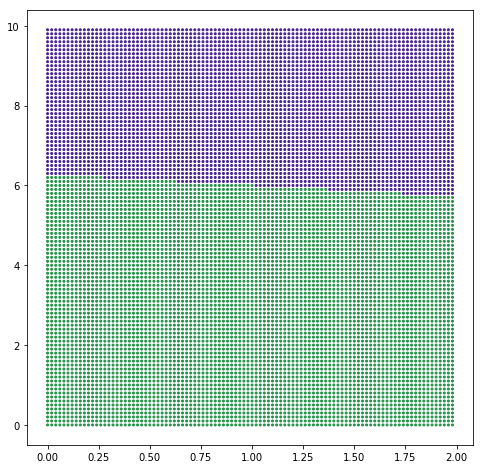

In [45]:
plt.scatter(xx[:,0], xx[:,1], c=cmap(pred), s=4)
#plt.scatter(x,y, c=cmap(clf.predict(lm_params)), linewidths=1, edgecolors='k')

plt.show()

In [46]:
clf2 = sklearn.cluster.KMeans(2)

In [47]:
clf2.fit(np.stack((x,y)).T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
pred2 = clf2.predict(xx)

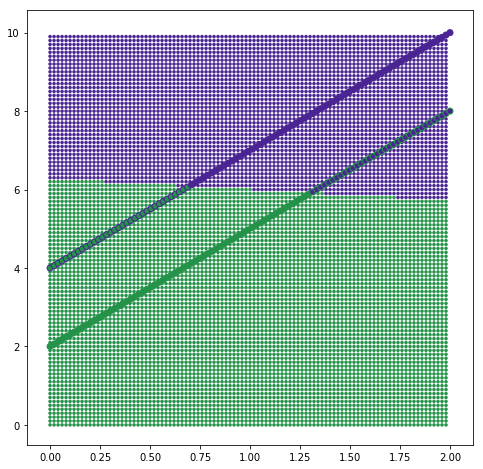

In [49]:
plt.scatter(xx[:,0], xx[:,1], c=cmap(pred2), s=6)
plt.scatter(x,y, c=cmap(clf2.predict(np.stack((x,y)).T)), linewidths=1, edgecolors=cmap(colors))

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

In [ ]:
print(animation.writers.list())

In [ ]:
xdata, ydata = x, y
offsets = np.stack((xdata, ydata)).T
multioffsets = []
for i in range(100):
    offsets[:,1] += np.random.normal(0,0.05,offsets.shape[0])
    multioffsets.append(np.copy(offsets))

fig = plt.figure()
decision_surface = plt.scatter(xx[:,0], xx[:,1], c=cmap(pred), s=6, animated=True)
scat = plt.scatter(x,y, c=cmap(clf.predict(lm_params)), linewidths=1, edgecolors='k', animated=True)

def init():
    return scat, decision_surface

def update(frame):
    offsets = multioffsets[frame]
    models.fit(offsets[:,:1], offsets[:,1:], offsets)
    pred = clf.predict(models.transform(xx,k=k))
    decision_surface.set_color(cmap(pred))
    scat.set_offsets(np.copy(multioffsets[frame]))
    return scat, decision_surface


ani = FuncAnimation(fig, update, frames=range(100),
                    init_func=init, blit=True)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='CScott!'), bitrate=1800)
ani.save('ani_k10_double.mp4', writer=writer)

HTML(ani.to_html5_video())
#offsets[:,1] += np.random.normal(0,0.05,offsets.shape[0])
#scat.set_offsets(offsets)
#scat